# Project 11-2: Use categorical variables with the diamond data

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

## Tasks

In [2]:
# 1
data = sns.load_dataset('diamonds')

In [3]:
# 2
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# 3
data.drop(columns=['x','y','z'], inplace=True)

In [5]:
# 4
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
dtypes: category(3), float64(3), int64(1)
memory usage: 1.8 MB


In [6]:
# 5
catColumns = ['cut','color','clarity']
dummies = pd.get_dummies(data[catColumns])

In [7]:
# 6
dataDummies = data.drop(columns=catColumns)
dataDummies = dataDummies.join(dummies)
dataDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   cut_Ideal      53940 non-null  bool   
 5   cut_Premium    53940 non-null  bool   
 6   cut_Very Good  53940 non-null  bool   
 7   cut_Good       53940 non-null  bool   
 8   cut_Fair       53940 non-null  bool   
 9   color_D        53940 non-null  bool   
 10  color_E        53940 non-null  bool   
 11  color_F        53940 non-null  bool   
 12  color_G        53940 non-null  bool   
 13  color_H        53940 non-null  bool   
 14  color_I        53940 non-null  bool   
 15  color_J        53940 non-null  bool   
 16  clarity_IF     53940 non-null  bool   
 17  clarity_VVS1   53940 non-null  bool   
 18  clarit

In [8]:
# 7
scaler = StandardScaler()
numCols = ['carat','depth','table']
dataDummies[numCols] = scaler.fit_transform(dataDummies[numCols])
dataDummies

,carat,depth,table,price,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_D,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,-1.198168,-0.174092,-1.099672,326,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-1.240361,-1.360738,1.585529,326,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-1.198168,-3.385019,3.375663,327,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,-1.071587,0.454133,0.242928,334,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,-1.029394,1.082358,0.242928,335,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,-0.164427,-0.662711,-0.204605,2757,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
53936,-0.164427,0.942753,-1.099672,2757,False,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
53937,-0.206621,0.733344,1.137995,2757,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
53938,0.130927,-0.523105,0.242928,2757,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [9]:
# 8
dataDummies.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
carat,0.921591
clarity_SI2,0.128420
table,0.127134
color_I,0.097125
cut_Premium,0.095706
color_J,0.081710
color_H,0.059223
cut_Fair,0.018728
clarity_SI1,0.008957


In [10]:
# 9
x_train, x_test = train_test_split(dataDummies, test_size=.30, random_state=20)

In [11]:
# 10
model=LinearRegression()
xCols=['carat','clarity_SI2','table','color_I','cut_Premium']
model.fit(x_train[xCols], x_train['price'])

LinearRegression()

In [12]:
# 11
model.score(x_test[xCols], x_test['price'])

0.8709240274421128

In [13]:
# 12
model.score(x_train[xCols], x_train['price'])

0.8681842247400542

In [14]:
# 13
y_predicted = model.predict(x_test[xCols])

In [15]:
# 14
predicted = pd.DataFrame(y_predicted, columns=['predicted_Price'])
final = predicted.join([x_test[xCols].reset_index(drop=True),
                       x_test['price'].reset_index(drop=True)])
final[['carat','clarity_SI2','table','color_I','cut_Premium','price','predicted_Price']].head()

,carat,clarity_SI2,table,color_I,cut_Premium,price,predicted_Price
0,1.523312,False,3.823196,False,False,8674,9533.355313
1,-0.544169,False,0.242928,False,True,1637,2120.600676
2,-0.206621,False,1.137995,False,True,2657,3286.818402
3,-0.438685,False,0.242928,False,False,1838,2496.243984
4,0.130927,True,0.242928,False,True,2980,3388.318299


In [16]:
# 15
final['residual'] = final.price - final.predicted_Price
final.head()

,predicted_Price,carat,clarity_SI2,table,color_I,cut_Premium,price,residual
0,9533.355313,1.523312,False,3.823196,False,False,8674,-859.355313
1,2120.600676,-0.544169,False,0.242928,False,True,1637,-483.600676
2,3286.818402,-0.206621,False,1.137995,False,True,2657,-629.818402
3,2496.243984,-0.438685,False,0.242928,False,False,1838,-658.243984
4,3388.318299,0.130927,True,0.242928,False,True,2980,-408.318299


<Axes: xlabel='residual', ylabel='Density'>

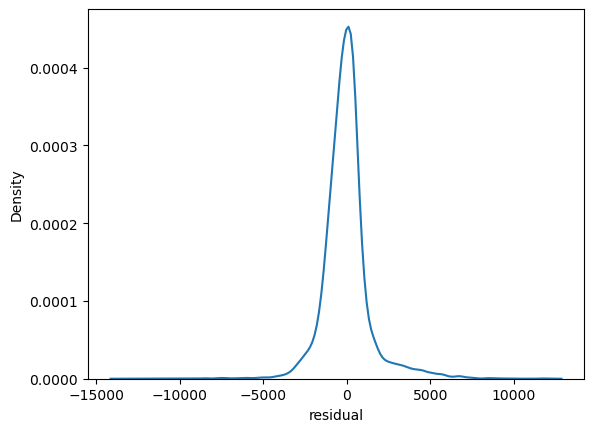

In [17]:
# 16
sns.kdeplot(data=final, x='residual')

In [18]:
# 17
model = LinearRegression()
testScores = []
trainScores = []

for i in range(1, len(x_train.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(x_train.drop(columns=['price']), x_train['price'])

    x_train_fs = fs.transform(x_train.drop(columns=['price']))
    x_test_fs = fs.transform(x_test.drop(columns=['price']))

    model.fit(x_train_fs, x_train['price'])
    
    testScore = model.score(x_test_fs, x_test['price'])
    trainScore = model.score(x_train_fs, x_train['price'])
    testScores.append(testScore)
    trainScores.append(trainScore)

<Axes: xlabel='numFeatures'>

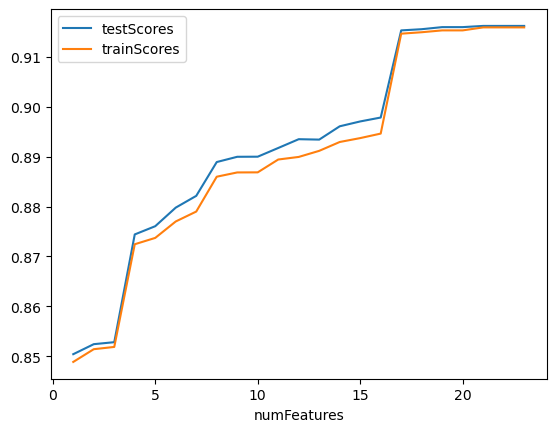

In [19]:
# 18
df = pd.DataFrame(data={'testScores':testScores, 'trainScores':trainScores})
df.reset_index(inplace=True)
df.rename(columns={'index':'numFeatures'}, inplace=True)
df['numFeatures'] = df['numFeatures'] + 1
df.plot(x='numFeatures', y=['testScores','trainScores'])